# imbalance is more common in leave majority classes : like having cancer vs not having , the sample is way less

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
%matplotlib inline

In [2]:
df =pd.read_csv("Excels\\Telecom_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
517400/df.shape[0]

73.46301292063042

In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape


(7043, 20)

In [12]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


C:\Users\musta\AppData\Local\Temp\ipykernel_8552\62923673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [15]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [16]:
df1[df1.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


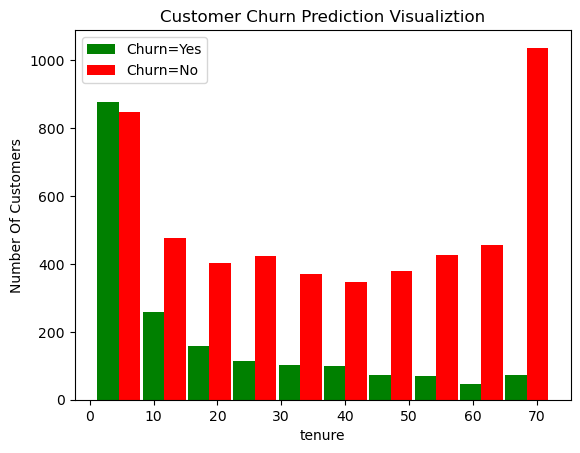

In [17]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

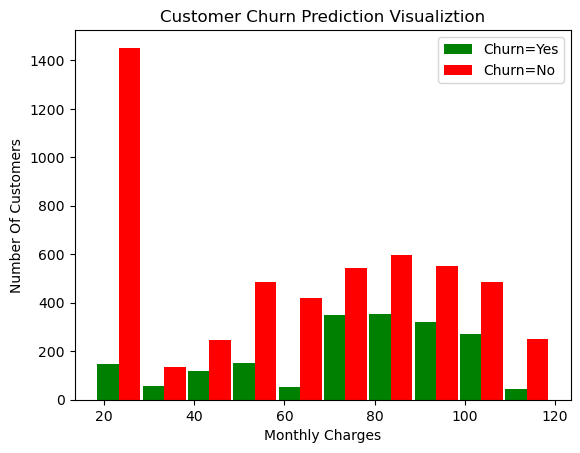

In [18]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [20]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\musta\AppData\Local\Temp\ipykernel_8552\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\musta\AppData\Local\Temp\ipykernel_8552\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\musta\AppData\Local\Temp\ipykernel_8552\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [24]:
df = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [27]:
df1.gender.unique()


array([1, 0], dtype=int64)

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6252,0,0,1,1,50,0,0,1,0,0,...,True,False,False,True,False,False,False,True,False,False
6100,1,1,1,0,29,1,1,0,0,1,...,False,True,False,True,False,False,True,False,False,False
3464,1,0,1,0,31,1,0,0,1,0,...,False,True,False,True,False,False,True,False,False,False
6277,0,0,0,0,2,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
2316,0,0,0,0,4,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [30]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [31]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [33]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# IMBALANCE TREATING

In [34]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [35]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [36]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1) # f1 score is bad for 1 which mean customer leaves

Epoch 1/100


C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7452 - loss: 0.5098
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.4257
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8014 - loss: 0.4060
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8028 - loss: 0.4142
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.4210
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.4178
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4057
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.4047
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8057 - loss: 0.4093
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7995 - loss: 0.4183
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.4050
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

# UnderSampling

In [37]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [38]:
df_class_0.shape

(5163, 27)

In [39]:
df_class_1.shape

(1869, 27)

In [40]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)

In [41]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [42]:
df_test_under.shape

(3738, 27)

In [43]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [44]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [45]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1) # here f1-score improved for class 1

Epoch 1/100


C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5762 - loss: 0.6602
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.5194
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7691 - loss: 0.4963
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.4792
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 0.4866
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7677 - loss: 0.4779
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.4788
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7758 - loss: 0.4714
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.4627
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7771 - loss: 0.4704
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7858 - loss: 0.4567
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7648 - lo

# Method2 : Oversampling

In [46]:
count_class_0 , count_class_1

(5163, 1869)

In [47]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True) # replace here duplicates data in class 1 to meet with count_class_0

In [48]:
df_class_1_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2954,1,0,0,0,0.084507,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2536,0,0,0,0,0.338028,1,1,0,0,0,...,False,False,True,False,True,False,True,False,False,False
6943,1,0,1,1,0.000000,0,0,1,0,0,...,True,False,False,True,False,False,True,False,False,False
1670,0,1,0,1,0.000000,1,0,0,0,1,...,True,False,False,True,False,False,False,False,False,True
6009,0,1,1,0,0.732394,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,0,0,1,0,0.211268,1,1,0,0,0,...,False,True,False,True,False,False,True,False,False,False
276,1,0,1,0,0.718310,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False
3410,0,0,0,0,0.028169,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
1211,1,0,1,1,0.140845,1,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False


In [49]:
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)

In [50]:
df_test_over.shape

(10326, 27)

In [51]:
df_test_over['Churn'].value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [52]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1) # here f1-score improved for class 1

Epoch 1/100


C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7005 - loss: 0.5791
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7585 - loss: 0.4977
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7631 - loss: 0.4824
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7665 - loss: 0.4810
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7756 - loss: 0.4641
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4655
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7683 - loss: 0.4738
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7813 - loss: 0.4540
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7808 - loss: 0.4564
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.4503
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.4589
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

# Method3 : SMOTE  ( Best )

In [55]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [58]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y) # uses K-Neighbors

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [66]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [67]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1) # best till now

Epoch 1/100


C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6627 - loss: 0.5974
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7759 - loss: 0.4780
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7850 - loss: 0.4665
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7799 - loss: 0.4598
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.4513
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7872 - loss: 0.4502
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4401
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4465
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 0.4300
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8045 - loss: 0.4310
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4271
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# Method4 Ensemble ( Majority Vote Batches)  ( Not the best )

In [69]:
df2['Churn'].value_counts()   

Churn
0    5163
1    1869
Name: count, dtype: int64

In [70]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [73]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [74]:
4130/1495 # so i need almost 3 batches to compare each with our y

2.762541806020067

In [75]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [76]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,True,False,True,False,False,False,False,False,True,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,True,False,True,False,False,False,True,False,False,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,False,False,False,False,True,True,False,False,False,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,False,False,True,False,False,False,False,False,True,0


In [77]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [79]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [87]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train 

In [88]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6411 - loss: 0.6473
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7526 - loss: 0.5091
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7620 - loss: 0.4968
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.5007
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4881
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.4773
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7765 - loss: 0.4746
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7610 - loss: 0.4891
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7667 - loss: 0.4729
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7697 - loss: 0.4761
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.4710
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - lo

In [89]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6128 - loss: 0.6600
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.5223
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.5071
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7595 - loss: 0.4943
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7668 - loss: 0.4883
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.4853
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.4729
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.4780
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.4813
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7800 - loss: 0.4631
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7687 - loss: 0.4628
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - lo

In [90]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5844 - loss: 0.6773
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7528 - loss: 0.5358
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.4797
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7588 - loss: 0.4851
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4683
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.4744
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.4715
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7785 - loss: 0.4744
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7857 - loss: 0.4606
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4546
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.4758
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7855 - lo

In [91]:
len(y_pred1)

1407

In [92]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [93]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407



In [94]:
# Exercise: Handling imbalanced data in machine learning
# Use this notebook but handle imbalanced data using simple logistic regression from skelarn library. 
# The original notebook using neural network but you need to use sklearn logistic regression or any other classification model 
# and improve the f1-score of minority class using
# Undersampling
# Oversampling: duplicate copy
# OVersampling: SMOT
# Ensemble
# Solution
# 
# Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
# 
# Build a deep learning model to predict churn rate at bank
# Once model is built, print classification report and analyze precision, recall and f1-score
# Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc
# Solution
# 
# Thanks https://github.com/src-sohail for providing this solution.

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("Excels\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis='columns')

In [24]:
df.shape

(10000, 11)

In [25]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [26]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [27]:
df['Exited'].value_counts() # Imbalance

0    7963
1    2037
Name: Exited, dtype: int64

In [28]:
df.dtypes # Geo and Gender is Strings

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [45]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


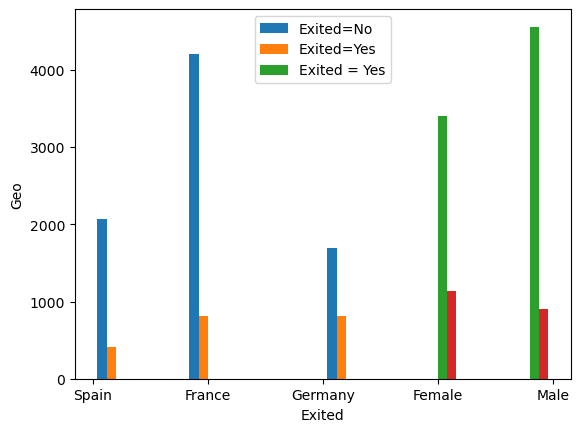

In [43]:
import matplotlib.pyplot as plt
geo_exited_no = df[df['Exited'] == 0]['Geography']
geo_exited_yes = df[df['Exited'] == 1]['Geography']
gender_exited_no = df[df['Exited'] == 0]['Gender']
gender_exited_yes= df[df['Exited'] == 1]['Gender']

plt.xlabel('Exited')
plt.ylabel("Geo")

plt.hist([geo_exited_no,geo_exited_yes,gender_exited_no,gender_exited_yes],label = ['Exited=No','Exited=Yes',"Exited = Yes"])
plt.legend()

In [53]:
df = pd.get_dummies(data=df , columns = ['Geography','Gender'],drop_first=True)

In [54]:
print_unique_col_values(df)

In [55]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [57]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [60]:
from sklearn.preprocessing import MinMaxScaler

col_to_scale=['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])
df[col_to_scale]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400
...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0.481341
9996,0.332,0.229730,1.0,0.228657,0.000000,0.508490
9997,0.718,0.243243,0.7,0.000000,0.000000,0.210390
9998,0.844,0.324324,0.3,0.299226,0.333333,0.464429


In [61]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


In [64]:
from sklearn.model_selection import train_test_split

X = df.drop(['Exited'],axis='columns')
y = df['Exited']

X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [65]:
X_train.shape

(8000, 11)

In [66]:
X_test.shape

(2000, 11)

In [81]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

In [100]:
def ANN(X_train,X_test,y_train,y_test,loss):
    model = keras.Sequential([
        keras.layers.Dense(units=13,input_dim=11,activation='relu'), # input_dim = input_shape 
        keras.layers.Dense(units=10,activation='relu'),
        keras.layers.Dense(units=1,activation='sigmoid')
    ])
# units is used to specify the number of neurons in each layer.
# input_dim is used in the first layer to specify the number of input features. Since it's the first layer, you need to specify the input shape.
# activation specifies the activation function for each layer.
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    model.fit(X_train,y_train,epochs=50)
    
    print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
        
    return y_preds

In [83]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy')

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7778 - loss: 0.5452
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7921 - loss: 0.4892
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7948 - loss: 0.4712
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8013 - loss: 0.4622
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4474
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4409
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8196 - loss: 0.4248
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8175 - loss: 0.4174
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8226 - loss: 0.4057
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8284 - loss: 0.3874
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8386 - loss: 0.3790
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [84]:
print("Classification Report : ", classification_report(y_test, y_preds))
# the precision, recall and f1 score of Class 1 is very low due to imbalanced dataset

Classification Report :                precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.83      0.38      0.52       407

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



# Method 1: Undersampling

In [88]:
count_exit_0,count_exit_1 = df['Exited'].value_counts()
count_exit_0,count_exit_1

(7963, 2037)

In [91]:
df_class_0 = df[df['Exited'] == 0]
df_class_1 = df[df['Exited'] == 1]

df_class_0.shape , df_class_1.shape

((7963, 12), (2037, 12))

In [94]:
df_class_0_under = df_class_0.sample(count_exit_1)
df_class_0_under.shape # we lost so much data

(2037, 12)

In [95]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

In [104]:
df_test_under

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2392,0.598,0.445946,0.4,0.000000,0.000000,1,1,0.751967,0,0,1,1
9662,0.796,0.283784,0.3,0.000000,0.333333,1,1,0.619994,0,0,1,1
1568,0.652,0.297297,0.8,0.454391,0.000000,1,1,0.339967,0,0,0,1
8077,0.686,0.297297,0.4,0.520777,0.000000,1,1,0.509586,0,0,0,1
6225,0.496,0.189189,0.9,0.493980,0.333333,1,0,0.994509,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,0.324324,0.3,0.605982,0.000000,1,1,0.267193,1,1,0,1
9982,0.610,0.378378,0.7,0.546617,0.000000,1,0,0.575729,1,1,0,0
9991,0.494,0.472973,0.4,0.352259,0.000000,1,0,0.346899,1,0,0,0
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0


In [99]:
print('Random under-sampling:')
print(df_test_under['Exited'].value_counts())

Random under-sampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [105]:
from sklearn.model_selection import train_test_split

X = df_test_under.drop(['Exited'],axis='columns')
y = df_test_under['Exited']

X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [106]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy')

Epoch 1/50


C:\Users\mustafa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4943 - loss: 0.7115
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5900 - loss: 0.6796
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6156 - loss: 0.6588
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6356 - loss: 0.6408
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6633 - loss: 0.6249
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6626 - loss: 0.6108
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6829 - loss: 0.6004
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6837 - loss: 0.6014
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6806 - loss: 0.5987
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6932 - loss: 0.5816
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6914 - loss: 0.5935
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [107]:
print("Classification Report : ", classification_report(y_test, y_preds)) 

Classification Report :                precision    recall  f1-score   support

           0       0.73      0.77      0.75       408
           1       0.76      0.71      0.73       407

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815



# Method2 : Oversampling

In [130]:
count_class_0 , count_class_1 = df['Exited'].value_counts()
count_class_0, count_class_1

(7963, 2037)

In [131]:
df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]
df_class_0.shape,df_class_1.shape

((7963, 12), (2037, 12))

In [132]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
# replace here duplicates data in class 1 to meet with count_class_0
df_class_1_over.shape

(7963, 12)

In [135]:
df_test_over = pd.concat([df_class_0 , df_class_1_over],axis=0)
df_test_over

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0
6,0.944,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0,0,0,1
8,0.302,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1833,0.626,0.189189,0.8,0.520640,0.000000,1,0,0.235771,1,1,0,1
6729,0.208,0.432432,1.0,0.370252,0.000000,1,0,0.771736,1,1,0,0
6496,0.490,0.351351,0.4,0.384832,0.333333,1,0,0.719772,1,1,0,0
9477,0.610,0.310811,0.5,0.000000,0.000000,0,0,0.182700,1,0,0,0


In [136]:
from sklearn.model_selection import train_test_split

X = df_test_under.drop(['Exited'],axis='columns')
y = df_test_under['Exited']

X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [137]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy')

Epoch 1/50


C:\Users\mustafa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5163 - loss: 0.6930
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5989 - loss: 0.6685
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6141 - loss: 0.6482
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6512 - loss: 0.6296
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6582 - loss: 0.6170
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6727 - loss: 0.6125
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.5957
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6855 - loss: 0.5924
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - loss: 0.5853
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6927 - loss: 0.5884
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 0.5737
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [138]:
print("Classification Report : ", classification_report(y_test, y_preds)) 

Classification Report :                precision    recall  f1-score   support

           0       0.76      0.75      0.75       408
           1       0.75      0.76      0.76       407

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



# Method3 : SMOTE  ( Best )

In [139]:
X = df.drop(['Exited'],axis='columns')
y = df['Exited']

In [142]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y) # uses K-neighbors

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [147]:
X_train , X_test, y_train , y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [148]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy')

Epoch 1/50


C:\Users\mustafa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5685 - loss: 0.6811
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6604 - loss: 0.6191
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6887 - loss: 0.5908
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7041 - loss: 0.5693
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7207 - loss: 0.5575
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7244 - loss: 0.5470
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7266 - loss: 0.5365
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7517 - loss: 0.5150
Epoch 9/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7524 - loss: 0.5097
Epoch 10/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7619 - loss: 0.4991
Epoch 11/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7676 - loss: 0.4844
Epoch 12/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [149]:
print("Classification Report : ", classification_report(y_test, y_preds))  # Best Results

Classification Report :                precision    recall  f1-score   support

           0       0.80      0.81      0.81      1593
           1       0.81      0.80      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

